## Problem Statement 

- In the real estate industry, accurately estimating house prices is crucial for buyers, sellers, and policymakers. This project focuses on building a machine learning regression model to predict median housing prices using the Boston Housing dataset. The model leverages features such as CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, and LSTAT to capture socio-economic, environmental, and structural factors affecting property values. The objective is to analyze these features, identify their impact on housing prices, and develop a robust predictive model that can assist in data-driven decision-making for real-world housing markets.

## 1. Import Libraries 

In [100]:
import pandas as pd
import numpy as np

#  Linear Regression (Class/Object)
from sklearn.linear_model import LinearRegression  
#  Ridge and Lasso Regression (Regularization Models)
from sklearn.linear_model import Ridge, Lasso 


#  train_test_split (Function)
from sklearn.model_selection import train_test_split  
#  Hyperparameter Tuning Tools (Classes/Objects)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

# Model Evalution metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# For multicolinearity check on the dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Data Gathering

In [3]:
df = pd.read_csv("Boston_HPP.csv")

In [4]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 3. Data Cleaning

In [5]:
df.isna().sum()

Unnamed: 0     0
CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
House_Price    0
dtype: int64

In [6]:
# There is no null value in dataset

## 4. Exploratory Data Analysis

In [7]:
df.dtypes

Unnamed: 0       int64
CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
B              float64
LSTAT          float64
House_Price    float64
dtype: object

In [8]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df = df.drop("Unnamed: 0", axis=1)

In [10]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [11]:
y = df["House_Price"]

In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

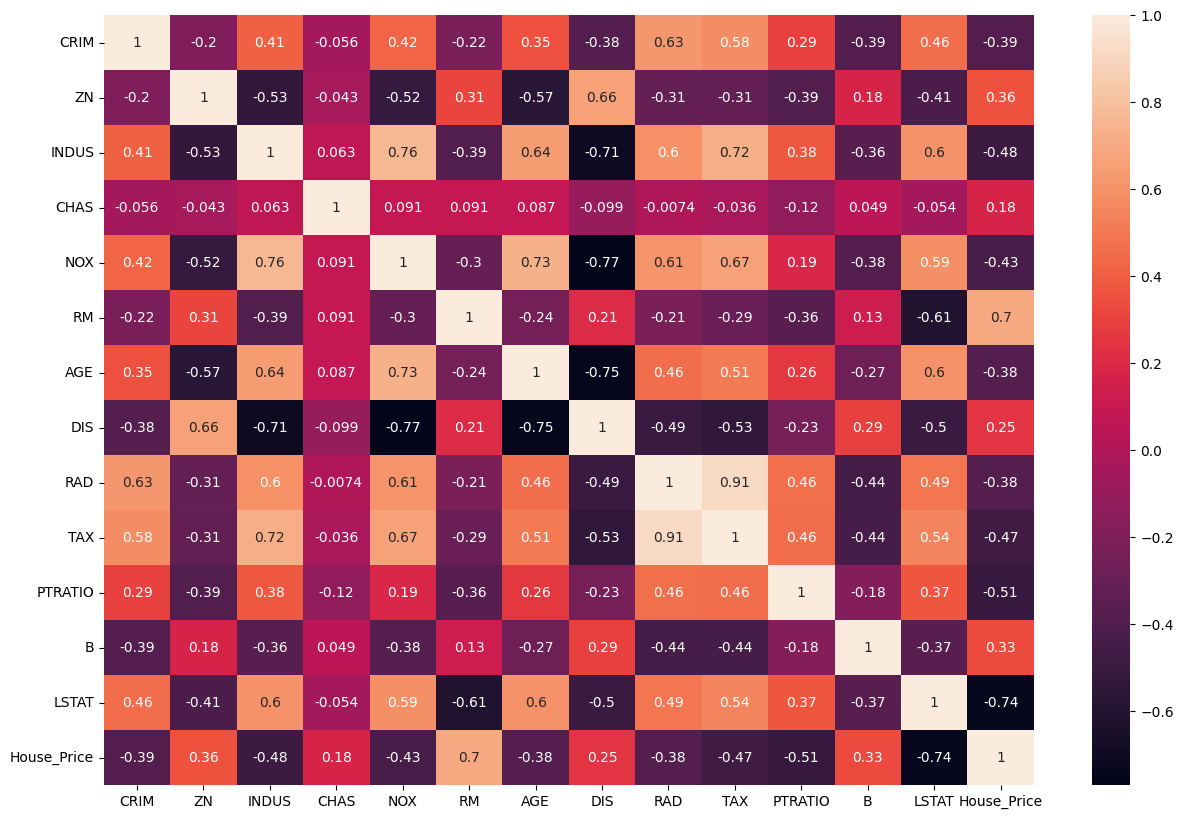

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True) # Annot = True used for numbers

<Axes: >

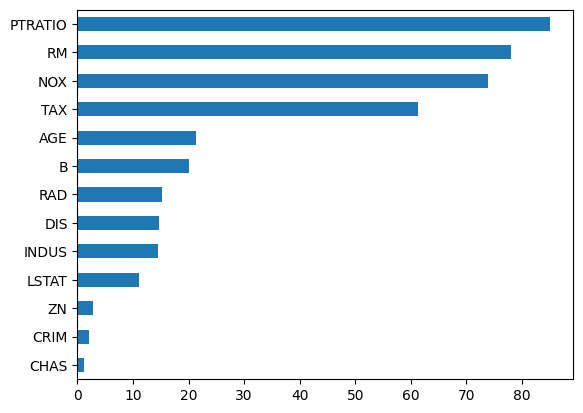

In [14]:
x = df.drop("House_Price",axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

In [15]:
# The multicolinearity value always need <= 5 , so reduce the features one by one to check the varvariance_inflation_factor

<Axes: >

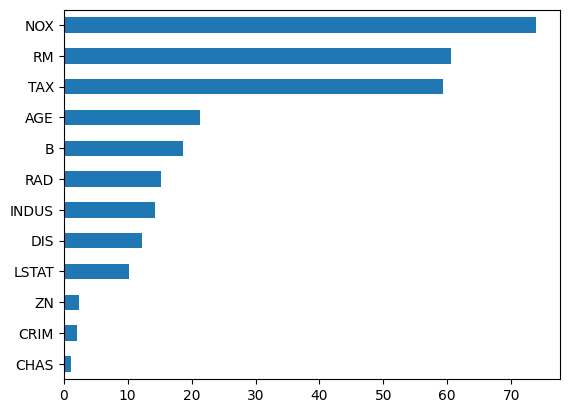

In [16]:
x = df.drop(["House_Price","PTRATIO"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

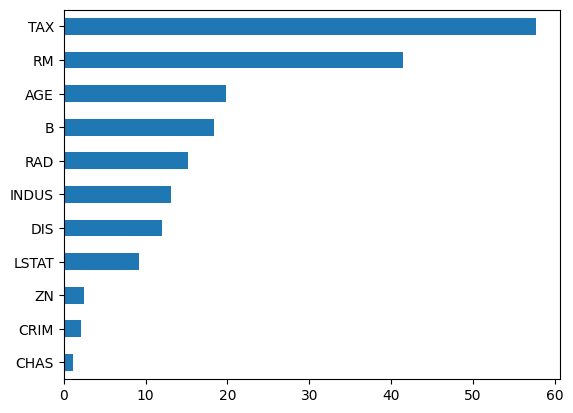

In [17]:
x = df.drop(["House_Price","PTRATIO","NOX"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

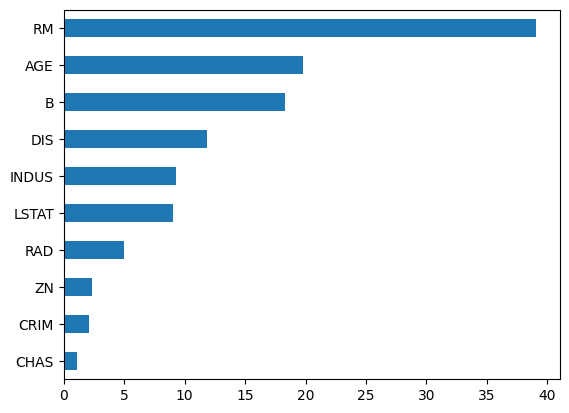

In [18]:
x = df.drop(["House_Price","PTRATIO","NOX","TAX"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

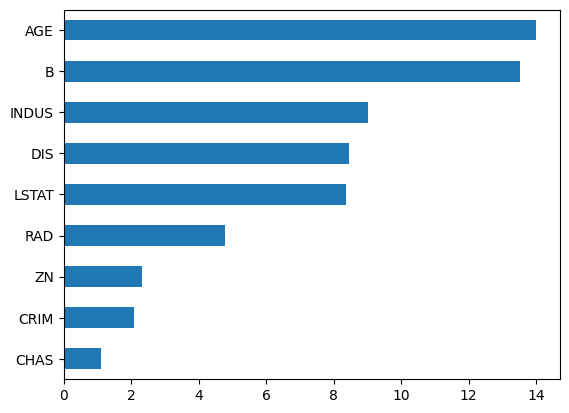

In [19]:
x = df.drop(["House_Price","PTRATIO","NOX","TAX","RM"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

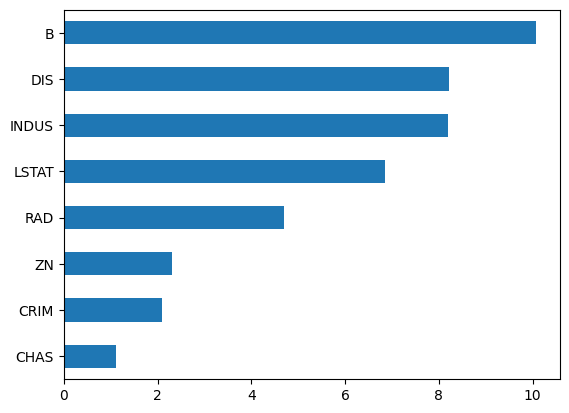

In [20]:
x = df.drop(["House_Price","PTRATIO","NOX","TAX","RM","AGE"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

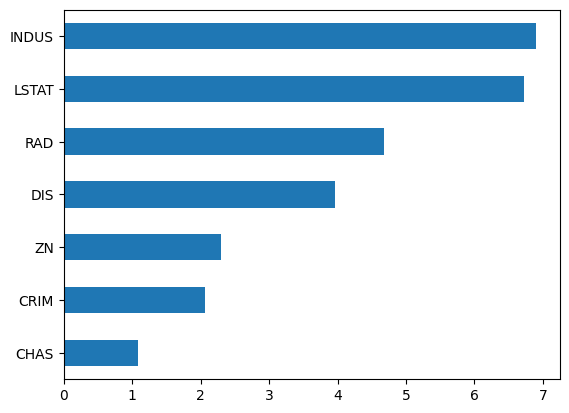

In [21]:
x = df.drop(["House_Price","PTRATIO","NOX","TAX","RM","AGE","B"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

<Axes: >

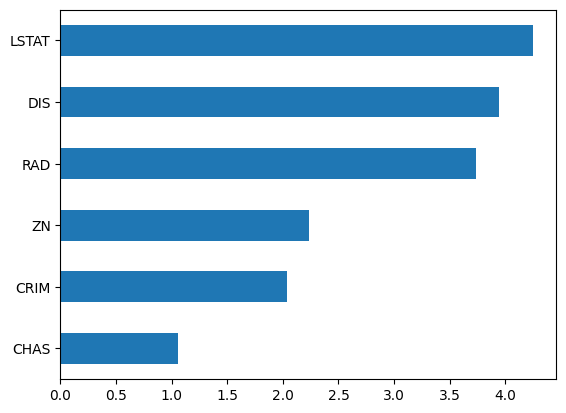

In [22]:
x = df.drop(["House_Price","PTRATIO","NOX","TAX","RM","AGE","B","INDUS"],axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = "barh")

In [23]:
# SO, I got the varivariance_inflation_factor is <= 5 after reducing the features 

In [24]:
x.tail(5)

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
501,0.06263,0.0,0.0,2.4786,1.0,9.67
502,0.04527,0.0,0.0,2.2875,1.0,9.08
503,0.06076,0.0,0.0,2.1675,1.0,5.64
504,0.10959,0.0,0.0,2.3889,1.0,6.48
505,0.04741,0.0,0.0,2.5050,1.0,7.88


In [25]:
y.tail(5)

501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House_Price, dtype: float64

## 5. Feature Engineering

In [26]:
# In feature engineering we perform the TCSE 
    # T - Transformation
    # C - Construction
    # S - Scaling
    # E - Extraction

# This is the random steps to follow in FE

# In feature enginerring we need to perform encoding on columns

#### Initial Feature Selection

In [27]:
x.columns

Index(['CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'LSTAT'], dtype='object')

In [28]:
x.head(2)

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,0.00632,18.0,0.0,4.0900,1.0,4.98
1,0.02731,0.0,0.0,4.9671,2.0,9.14


In [29]:
y.head(2)

0    24.0
1    21.6
Name: House_Price, dtype: float64

In [30]:
# in x we have 6 columns
# In y we have 1 columns(target variable)

## 6. Model Training

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [32]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation 

#### Model Evaluation with Test Data

In [33]:
y_pred = lr_model.predict(x_test)

In [34]:
# MSE - Avg squared diff betn actual value and predicted value - Lower MSE = better model performance.
# MAE - Avg diff betn actual value and predicted value - Low MAE = Model predictions are close to actual values (good performance)
# r2_Score - Closer to 1 → Better (gives in percentage)

In [35]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score_ = r2_score(y_test,y_pred)

print("MSE is :",mse)
print("MAE is :",mae)
print("r2_Score is :",r2_score_) # 63%

MSE is : 27.868621341651455
MAE is : 3.928643336241648
r2_Score is : 0.6151999323738684


#### Model Evaluation with Train Data

In [36]:
y_pred_train = lr_model.predict(x_train)

In [37]:
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_score_ = r2_score(y_train,y_pred_train)

print("MSE is :",mse)
print("MAE is :",mae)
print("r2_Score is :",r2_score_) # 60%

MSE is : 34.11072756850594
MAE is : 4.2355542626838805
r2_Score is : 0.6142825217132475


In [38]:
# Overfitting - If the model performs well on train data but not perform well on testing data 

In [39]:
# Underfitting - If the model doesnot capture the true relationship betn input and output features

In [40]:
# Checking the coefficient  of model 

In [41]:
# series_1 = pd.Series(lr_model.coef_,index=x.columns)
# series_1.sort_values().plot(kind = "barh")

In [42]:
lr_model.coef_

array([-0.07987356,  0.10591256,  3.41172259, -1.39865234, -0.09293212,
       -0.91230046])

In [43]:
lr_model.intercept_

np.float64(39.2603271448025)

In [44]:
# lr_model.coef_, lr_model.intercept_  = Predicted values/ line

<BarContainer object of 6 artists>

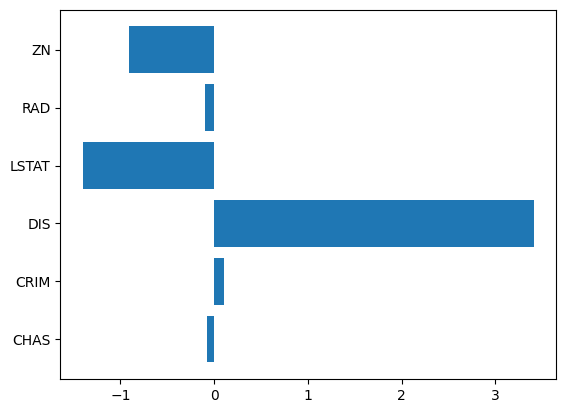

In [45]:
plt.barh(x.columns.sort_values(),lr_model.coef_)

 #### Ridge Regression

In [46]:
rr_model = Ridge()
rr_model.fit(x_train,y_train)

Ridge()

##### Model Evaluation with Test Data 

In [47]:
y_pred = rr_model.predict(x_test)

In [48]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score_ = r2_score(y_test,y_pred)

print("MSE is :",mse)
print("MAE is :",mae)
print("r2_Score is :",r2_score_) # 63%

MSE is : 27.911124323693127
MAE is : 3.9289571558204033
r2_Score is : 0.6146130662292018


In [49]:
rr_model.coef_

array([-0.08018322,  0.10592781,  3.26920171, -1.40008335, -0.09278724,
       -0.91275964])

##### Model Evalution with train Data 

In [50]:
y_pred_train = lr_model.predict(x_train)

In [51]:
rr_model.coef_

array([-0.08018322,  0.10592781,  3.26920171, -1.40008335, -0.09278724,
       -0.91275964])

In [52]:
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_score_ = r2_score(y_train,y_pred_train)

print("MSE is :",mse)
print("MAE is :",mae)
print("r2_Score is :",r2_score_) # 60%

MSE is : 34.11072756850594
MAE is : 4.2355542626838805
r2_Score is : 0.6142825217132475


<BarContainer object of 6 artists>

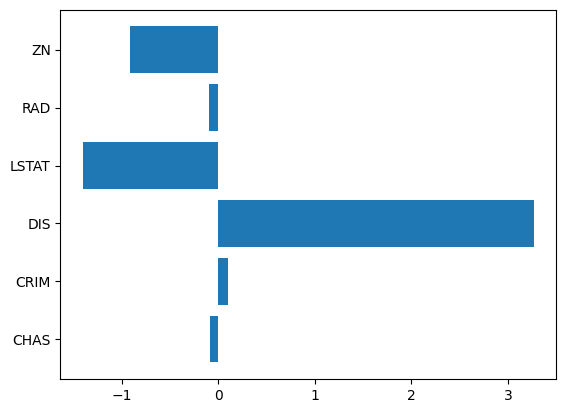

In [53]:
plt.barh(x.columns.sort_values(),rr_model.coef_)

<BarContainer object of 6 artists>

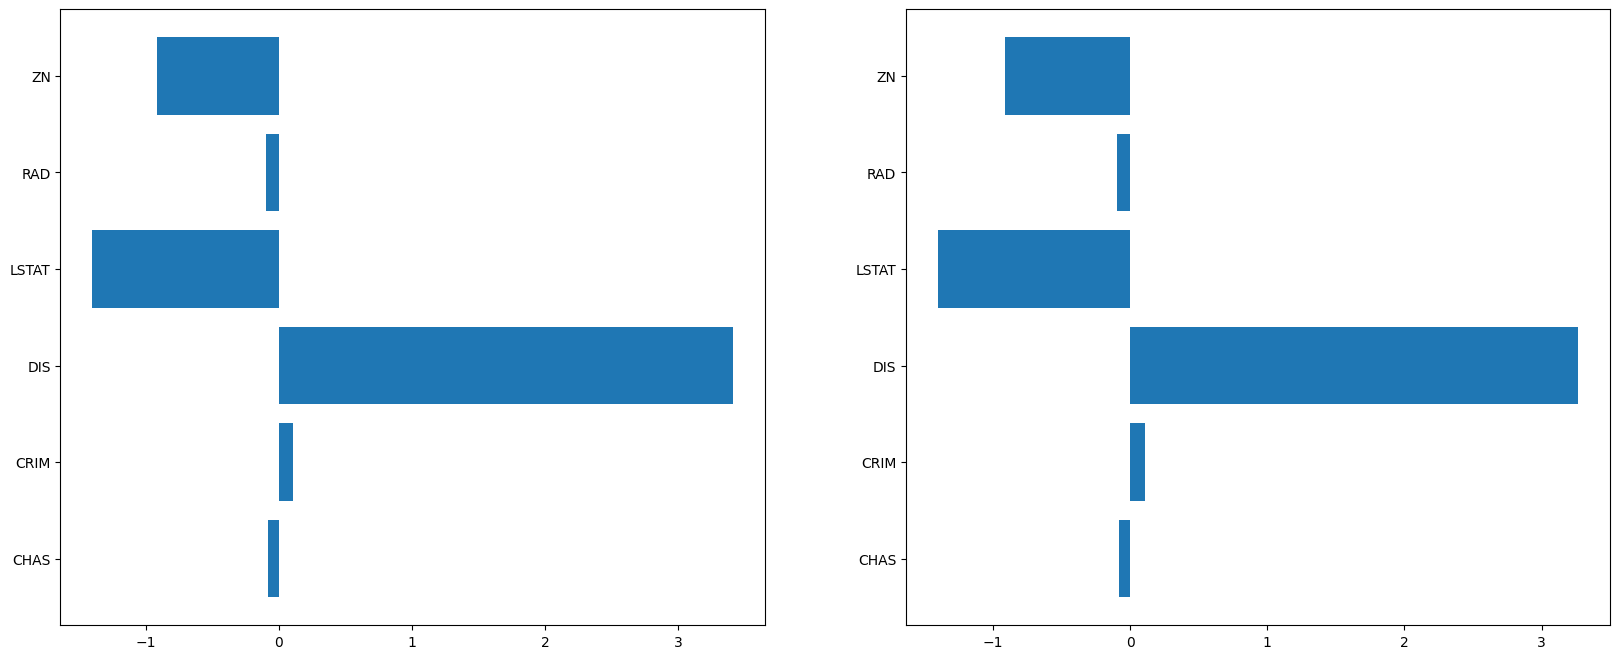

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.barh(x.columns.sort_values(),lr_model.coef_)
plt.subplot(1,2,2)
plt.barh(x.columns.sort_values(),rr_model.coef_)

In [55]:
# There is no affect on the coefficient on the dataset 

#### Lasso Regression

In [56]:
ls_model = Lasso()

In [57]:
ls_model.fit(x_train, y_train)

Lasso()

##### Model Evaluation on Test Data 

In [58]:
y_pred = ls_model.predict(x_test)

In [59]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score_ = r2_score(y_test,y_pred)

print("MSE is :",mse)
print("MAE is :",mae)
print("r2_Score is :",r2_score_) # 63%

MSE is : 30.86703337403405
MAE is : 4.032753458048904
r2_Score is : 0.5737989194322122


##### Model Evaluation on test data

In [60]:
y_pred = ls_model.predict(x_train)

In [61]:
mse = mean_squared_error(y_train,y_pred_train)
mae = mean_absolute_error(y_train,y_pred_train)
r2_score_ = r2_score(y_train,y_pred_train)

print("MSE is :",mse)
print("MAE is :",mae)
print("r2_Score is :",r2_score_) # 60%

MSE is : 34.11072756850594
MAE is : 4.2355542626838805
r2_Score is : 0.6142825217132475


In [62]:
ls_model.coef_

array([-0.06974481,  0.0794027 ,  0.        , -0.85345813, -0.05806727,
       -0.88593033])

In [63]:
ls_model.intercept_

np.float64(37.04607825196818)

<BarContainer object of 6 artists>

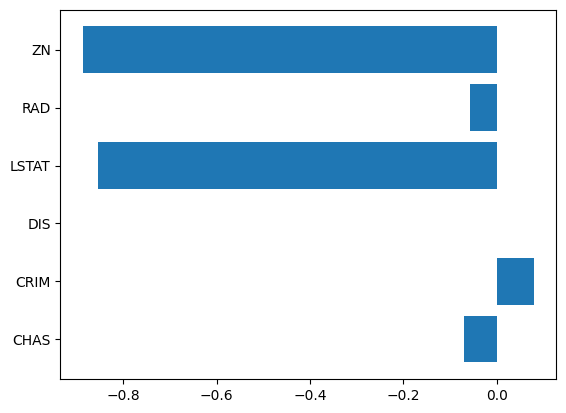

In [64]:
plt.barh(x.columns.sort_values(),ls_model.coef_)

<BarContainer object of 6 artists>

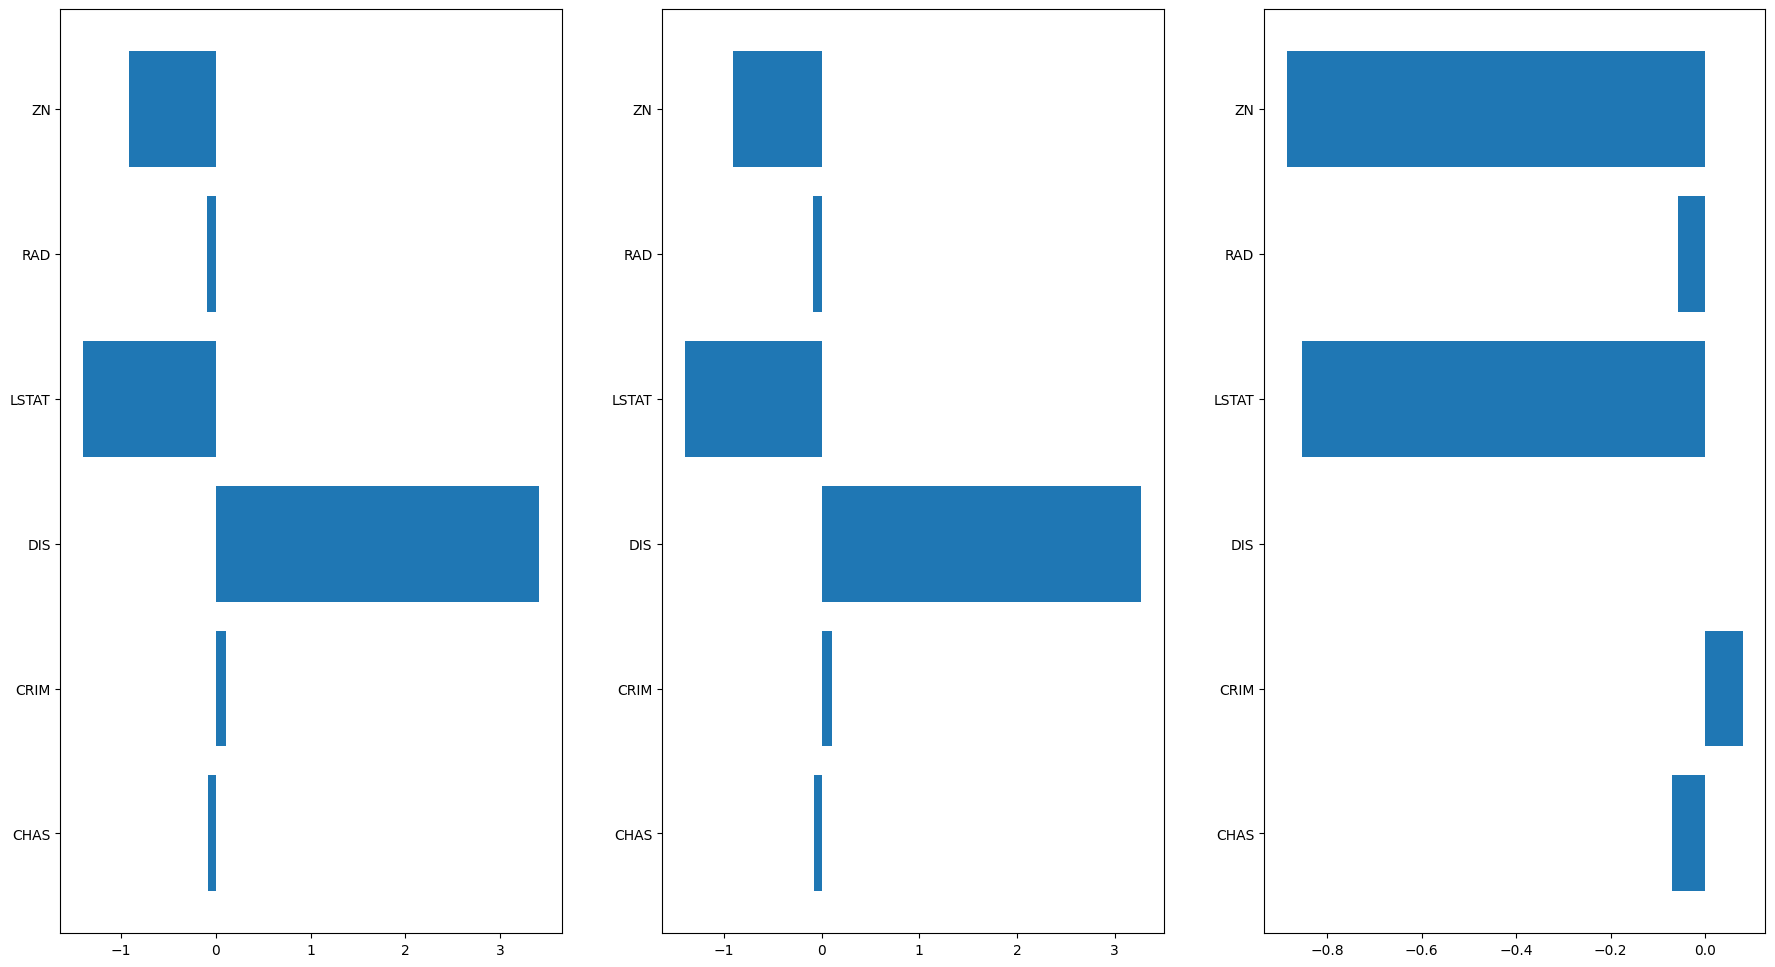

In [65]:
plt.figure(figsize=(22,12))
plt.subplot(1,3,1)
plt.barh(x.columns.sort_values(),lr_model.coef_)
plt.subplot(1,3,2)
plt.barh(x.columns.sort_values(),rr_model.coef_)
plt.subplot(1,3,3)
plt.barh(x.columns.sort_values(),ls_model.coef_)

In [66]:
coef_df = pd.DataFrame({"Linear Regression":lr_model.coef_,"Ridge Regression":rr_model.coef_,"Lasso Regression":ls_model.coef_})
coef_df

,Linear Regression,Ridge Regression,Lasso Regression
0,-0.079874,-0.080183,-0.069745
1,0.105913,0.105928,0.079403
2,3.411723,3.269202,0.000000
3,-1.398652,-1.400083,-0.853458
4,-0.092932,-0.092787,-0.058067
5,-0.912300,-0.912760,-0.885930


# Hyperparameter tuning 

In [67]:
# - it is a technique used when the model does not perform well on data
# - Cross Validation - splitting the data in diffrent combination 
# - the split value decided with the help of alpha

In [ ]:
# Hyperparameter tuning
    # 1. GridSearchCV(Cross Validation)
    # 2. RandomizedSearchCV

### 1. Ridge Regression with GridSearchCV

In [ ]:
# - It will select the all parameters in the model and gives the best fit parameter so, with the help of alpha

In [68]:
rr_model = Ridge()

In [70]:
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_rr_model = GridSearchCV(rr_model,param_grid, cv = 5) # cv=5 → 5-fold cross-validation
gscv_rr_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [71]:
gscv_rr_model.best_estimator_

Ridge(alpha=np.float64(2.9899999999999998))

In [72]:
# The apha value got the 2.98

In [73]:
rr_model = Ridge(alpha=0.01)

rr_model.fit(x_train, y_train)
y_pred = rr_model.predict(x_test)
y_pred

array([31.80111102, 27.30230158, 23.80596948, 12.25983048, 25.68094651,
       14.41229627, 12.72600476, 31.28236419, 24.60996723, 28.76904066,
       34.57135918, 28.10947638, 30.33559802, 24.14983697, 17.52901086,
       22.50886056, 16.20955144, 11.4475236 , 25.24852204, 13.79436709,
       27.39244193, 24.91021532, 22.54867567, 28.02127502, 19.17127914,
       37.56181219, 25.73109651, 27.29495571, 26.95789324, 15.47937781,
       24.3346372 , 14.94046648, 19.30388852, 16.61023447, 30.79992321,
       25.45145184, 19.27518111, 27.38068059, 20.59170149, 16.54812513,
       34.43045122, 37.45375915, 29.03767478, 26.16333261, 33.00450439,
       32.16247824, 20.86627986, 28.39989246, 23.11370976, 22.24245408,
       21.77208758, 22.98457077, 19.05023583, 18.6661405 , 32.28001962,
        3.97591069, 23.60168267, 28.44858492, 17.9496958 , 19.31752454,
       18.92381619, 30.19639581, 25.20846444, 17.12626832, 24.29502941,
       23.51653642, 15.67017623, 22.97692641, 16.87461009, 20.91

In [74]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 27.86904927741031
MAE: 3.9286467530567015
R2: 0.6151940235882515


In [75]:
y_pred_train = rr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 34.11072770163971
MAE: 4.235553359263589
R2: 0.6142825202077968


<BarContainer object of 6 artists>

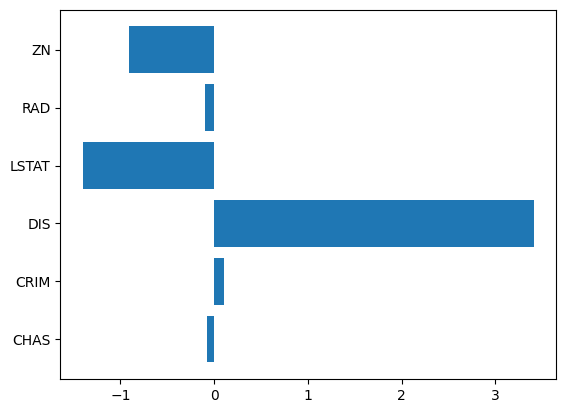

In [76]:
plt.barh(x.columns.sort_values(),rr_model.coef_)

### 2. Ridge Regression with RandomizedSearchCV

In [77]:
rr_model = Ridge()

param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rr_model = RandomizedSearchCV(rr_model,param_grid, cv = 5)
rscv_rr_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [78]:
rscv_rr_model.best_estimator_

Ridge(alpha=np.float64(2.9699999999999998))

In [79]:
rr_model = Ridge(alpha=0.38)

rr_model.fit(x_train, y_train)
y_pred = rr_model.predict(x_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 27.884846095635094
MAE: 3.9287691101213715
R2: 0.6149759067088172


In [81]:
y_pred_train = rr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 34.11091372708402
MAE: 4.2355245708171285
R2: 0.6142804166682246


## 1. Lasso Regression with GSCV and RSCV

In [85]:
ls_model = Lasso()

In [86]:
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_ls_model = GridSearchCV(ls_model,param_grid,cv=5)
gscv_ls_model.fit(x_train,x_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [87]:
gscv_ls_model.best_estimator_

Lasso(alpha=np.float64(0.01))

In [88]:
ls_model = Lasso(alpha=0.01)

ls_model.fit(x_train,y_train)
y_pred = ls_model.predict(x_test)

In [89]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score_ = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 27.918621308551447
MAE: 3.928255495637357
R2: 0.6145095505136196


In [90]:
y_pred_train = ls_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2_score_ = r2_score(y_train, y_pred_train)

print("MSE:", mse)
print("MAE:",mae)
print("R2:", r2_score_)

MSE: 34.11236972998982
MAE: 4.235411724909432
R2: 0.6142639524703245


## Elastic Net Regression 

In [92]:
from sklearn.linear_model import ElasticNet

In [93]:
en_model = ElasticNet()

In [94]:
import time
start_time = time.time()
# time.sleep(5)


In [95]:
end_time = time.time()
(end_time-start_time)/60

0.09537662267684936

In [97]:
start_time = time.time()

param_grid = {"alpha":np.arange(0.01,3,0.01),"l1_ratio":np.arange(0.01,3,0.01)}
gscv_en_model = GridSearchCV(en_model,param_grid,cv = 5)
gscv_en_model.fit(x_train,y_train)

end_time = time.time()
print("Time taken to run GSCV with two parameters:", (end_time-start_time)/60)
gscv_en_model.best_estimator_


## User Input 

In [ ]:
x.columns

In [ ]:
x.head()

In [99]:
crim = 0.00632
zn = 18
indus = 2.31
chas = 00.0
nox = 0.538
rm = 6.575
age = 65.2
dis = 4.09
rad = 1
tax = 296
ptratio = 15.3
b = 396
lstat = 4.98

array = np.array([crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat])

predicted_price = np.round(lr_model.predict([array])[0],2)
print("The predicted house price is:", predicted_price,"K $")

### Outcome

- The project successfully predicted Boston house prices while addressing multicollinearity. Regularization (Ridge & Lasso) not only improved predictive performance but also enhanced model interpretability, proving their value in real-world regression tasks.